<hr/>

# Introduction to Data Science
**Tamás Budavári** - budavari@jhu.edu <br/>

- Eigensystem of covariance matrix
- Fitting lines and planes

<hr/>

<h1><font color="darkblue">Recap from last time</font></h1>

### Eigendecomposition 

- If we multiply with $E$ and $E^T$ from left and right 

> $ C = E\,\Lambda\,E^T$
><br/><br/>
> or
><br/><br/>
>$\displaystyle C = \sum_{k=1}^N\ \lambda_k\left(\boldsymbol{e}_k\,\boldsymbol{e}_k^T\right) $

### Scree Plot

- The eigenvalue spectrum

>$ \big\{ \lambda_1, \lambda_2, \dots, \lambda_N \big\}$

- How many important directions?

> Keep $K =\,?$ principal components

- Explained variance 

> Cf. $\mathbb{Var}[X\pm{}Y] = \mathbb{Var}[X]+\mathbb{Var}[Y]$

#### Generate data

In [1]:
%pylab inline
pylab.rcParams['figure.figsize'] = (4,4)

Populating the interactive namespace from numpy and matplotlib


In [2]:
from scipy.stats import norm as gaussian
import pandas as pd

In [3]:
# generate 10-D vectors: scale, rotate
np.random.seed(1)
Z = gaussian.rvs(0,1,(10,1000))
if True: # scale them here
    for i in range(Z[:,0].size): 
        Z[i,:] *= sqrt(i)
    Z[:4,:] *= 1e-7
    
# quick-n-dirty random rotation
M = random.randn(Z[:,0].size,Z[:,0].size)
Q,_ = np.linalg.qr(M) # QR decomposition
Y = Q.dot(Z) # random rotation
print (Y.shape)
np.savetxt("temp.csv", Y.T, delimiter=",")

(10, 1000)


In [4]:
# remove all previous variables from memory
del Y, M, Q, Z

In [5]:
try:
    print ("Shape of Y" % Y.shape)
except NameError as e:
    print ("Error message: %s" % e)    

Error message: name 'Y' is not defined


#### Analyze data

Now your data file is available here: [temp.csv](temp.csv)

In [6]:
# pandas dataframe - table data structure
df = pd.read_csv('temp.csv',header=None)
df[:3] # slice like arrays

,0,1,2,3,4,5,6,7,8,9
0,-1.505335,2.453394,-4.075387,0.506457,2.099745,-6.931051,-0.168452,-0.310699,-0.018441,-4.934232
1,0.494729,2.499596,1.114845,0.424238,-1.877948,-1.296794,-1.740021,2.978778,-1.480376,-0.246117
2,-0.892449,-2.503452,-0.374558,3.173975,1.820951,2.757170,-0.067205,-4.549206,1.550991,0.084282


In [7]:
df.sample(10)

,0,1,2,3,4,5,6,7,8,9
661,1.599262,-0.134136,1.337225,-1.393118,-1.239683,1.524504,-0.695065,2.235754,-1.565070,1.882983
872,1.793567,-2.577107,0.044555,1.857821,-3.081358,-0.473291,-1.649679,3.156761,0.972401,0.442560
438,-0.995479,0.857734,-0.430812,1.530937,-2.297405,-1.713198,-0.933416,2.510584,-0.200683,-0.533570
297,0.741324,-1.107882,0.491351,5.416071,0.537480,0.532694,-2.655168,-2.767506,1.681681,-1.598722
826,-0.722987,3.969929,2.134354,0.944250,-0.338300,-0.240584,-1.042847,0.070664,-0.828876,-0.642765
123,0.674503,-1.634307,1.952596,1.747951,-0.960460,1.289346,0.424987,-1.322329,3.530124,0.097470
67,0.539935,0.913040,0.959802,-2.992410,-2.196798,-2.325524,1.798785,3.270741,1.657583,-0.118455
287,-1.554865,1.544594,-0.486678,3.563812,-1.088476,-2.533135,-1.295541,0.173552,1.091226,-2.291509
255,3.873505,-6.313239,0.109256,-0.669367,-0.994822,1.402197,0.608067,0.550045,3.317865,1.359758
973,0.611314,2.165181,0.587248,-2.745230,1.655220,-2.404931,1.667544,-0.844996,1.322658,-1.765189


In [8]:
# re-load the Y matrix and convert dataframe to matrix
Y = pd.read_csv('temp.csv',header=None).values.T
Y.shape

(10, 1000)

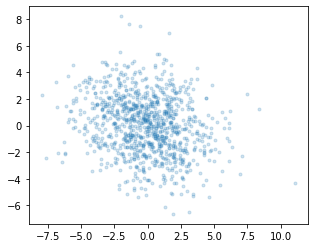

In [9]:
subplot(111,aspect='equal')
plot(Y[0,:],Y[3,:], '.', alpha=0.2);

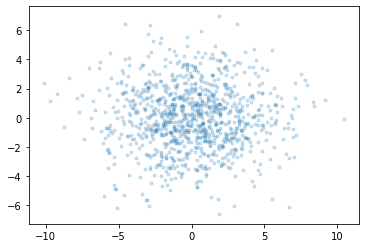

In [10]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=Y.shape[0], whiten=False)
B = pca.fit_transform(Y.T).T
E, L = pca.components_.T, pca.explained_variance_

subplot(111,aspect='equal')
plot(B[0,:],B[4,:], '.', alpha=0.2);

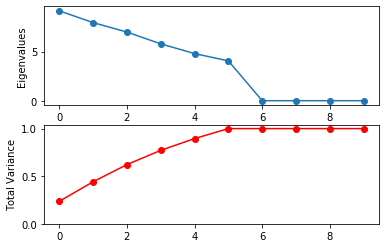

In [11]:
subplot(211); plot(L,'o-'); ylabel('Eigenvalues');
subplot(212); cl=np.cumsum(L); ylabel('Total Variance');
plot(cl/cl[-1],'o-r'); ylim(0,None);

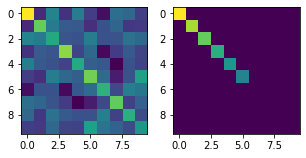

In [12]:
# plot orig and new covariance matrices (estimate w/o norm)
figure(figsize=(5,2.5))
subplot(121); imshow(Y.dot(Y.T),interpolation='none');
subplot(122); imshow(B.dot(B.T),interpolation='none');

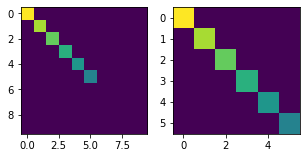

In [13]:
A = B[:6,:]
# plot orig and new covariance matrices (estimate w/o norm)
figure(figsize=(5,2.5))
subplot(121); imshow(B.dot(B.T),interpolation='none');
subplot(122); imshow(A.dot(A.T),interpolation='none');

### Inverse of the Covariance Matrix

- Appears in the multivariate normal distribution!

>$\displaystyle{\cal{}N}(x;\mu,C) \propto \exp\left[-\frac{1}{2}(x\!-\!\mu)^T\,C^{-1} (x\!-\!\mu)\right]$

- Inverse of the diagonal eigenvalue matrix

>$\displaystyle \Lambda^{-1} =  \left( \begin{array}{ccc}
\frac{1}{\lambda_1} &  & \cdots & 0\\
 & \frac{1}{\lambda_2} &   & \vdots\\
\vdots &  & \ddots &  \\
0 & \cdots &  & \frac{1}{\lambda_N} \\
\end{array} \right)$

- Inverse of the covariance matrix

>$\displaystyle C^{-1} = E\ \Lambda^{-1} E^T$

- Also see pseudoinverse with small eigenvalues 

### Fitting Lines

- What if $x$ and $y$ are both noisy? 

> For example, $\big\{(x_i,y_i)\big\}$ measurements have the same uncertainties. 
> The relevant residuals are perpendicular to the line.
> Minimizing RMS of residuals is related to maximizing the sample variance along line!

- Sounds like the PCA problem?


### Fitting Planes

- Similarly, fitting a $K$-dimensional hyperplane in $N$ dimensions, i.e., looking for the $a$ normal vector to minimize residuals on set of centered $\{x_i\}$ vectors

> Minimizing sum of square lengths of the residual vectors
><br/><br/>
>$\displaystyle \qquad \min_a \sum_i r_i^2(a) \ \ \ \ \ $  where $\ \ \ r_i(a) = x_i - \left(a\,a^T\right)x_i$, 
><br/><br/>
> yields 
><br/><br/>
>$\displaystyle \qquad \min_a \ \left[\textrm{const} - \sum_i a^T\!\!\left(x_i x_i^T\right) a\right]$
><br/>
or
><br/>
>$\displaystyle \qquad \max_a \ a^T\!\left(\sum_i x_i x_i^T\right)\, a $ 
><br/><br/>
> cf. sample variance along $a$, if data already centered

- Essentially same as the PCA problem!

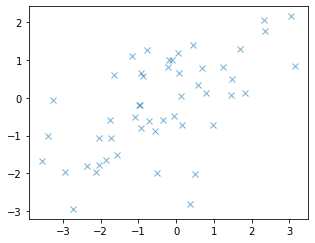

In [14]:
# generate 2D (column) vectors
np.random.seed(seed=42);
N = gaussian.rvs(0,1,(2,50)); 
N[0,:] *= 2 
f = +pi/6   # rotate by 30 deg
R = array([[cos(f), -sin(f)],
           [sin(f),  cos(f)]]) 
X = R.dot(N)

figure(figsize=(5,5)); subplot(111,aspect='equal');
plot(X[0,:],X[1,:],'x',alpha=0.6);

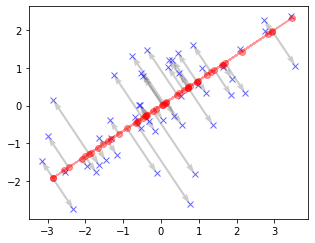

In [15]:
# project on 1st pricipal component
X -= mean(X, axis=1).reshape(X[:,1].size,1)
E,_,_ = linalg.svd(X) # only eigenvectors
F = E[:,:1]           # truncated basis: only PC1
P = F.dot(F.T).dot(X) # projection
R = X - P;            # residuals

figure(figsize=(5,5)); subplot(111,aspect='equal');
plot(X[0,:],X[1,:],'xb',alpha=0.6);
plot(P[0,:],P[1,:],'-or',alpha=0.4);
quiver(P[0,:],P[1,:],R[0,:],R[1,:], alpha=0.2,
    angles='xy',scale_units='xy',scale=1);

### More on Fitting Later

- Next: Bayesian inference